# Bland Altman Analyses

Read in the estimates

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.agreement import mean_diff_plot

file_path = '/Users/reblocke/Research/llm_estimate_lrs/Past Runs/Copy of NNT_LRs_PC_03.16.2025.xlsx'
use_columns = ['lr_reported', 'lr_gpt-4o-mini-2024-07-18', 'lr_gpt-4o-2024-08-06']
df = pd.read_excel(file_path, sheet_name='MASTER', usecols=use_columns)

print(df.head())

   lr_reported  lr_gpt-4o-mini-2024-07-18  lr_gpt-4o-2024-08-06
0   145.893797                       20.0                 100.0
1    57.000000                        5.5                   4.5
2    53.000000                        1.0                   1.0
3    47.000000                        5.0                   2.5
4    44.000000                        4.5                   5.0


First, ensure that there are no missing values - then create log transformed versions of each LR (aka "Weights of Evidence")

In [ ]:
cols_to_log = ['lr_reported', 'lr_gpt-4o-mini-2024-07-18', 'lr_gpt-4o-2024-08-06']
df[cols_to_log].le(0).any()
for col in cols_to_log:
    df[f'ln_{col}'] = np.log(df[col])

### Create Bland-Altman Plots for each

LR Reported vs 4o mini

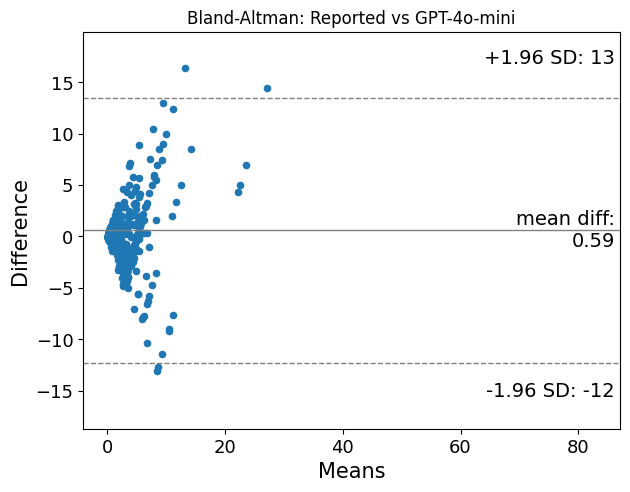

In [9]:
fig = mean_diff_plot(df['lr_reported'], df['lr_gpt-4o-mini-2024-07-18'])
plt.title('Bland-Altman: Reported vs GPT-4o-mini')
plt.show()

Log Transformed Version

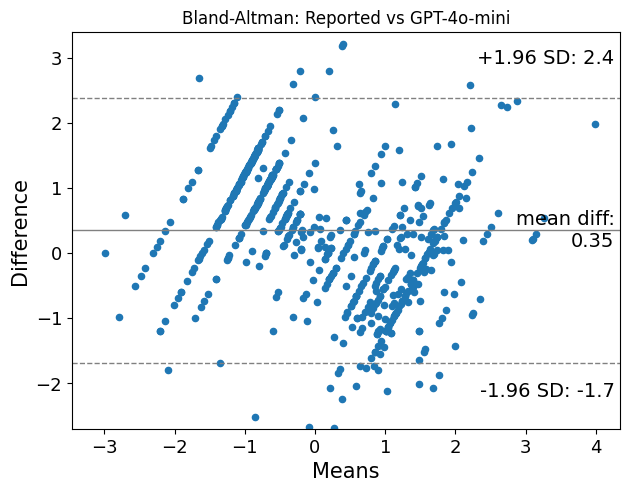

In [8]:
fig = mean_diff_plot(df['ln_lr_reported'], df['ln_lr_gpt-4o-mini-2024-07-18'])
plt.title('Bland-Altman: Reported vs GPT-4o-mini')
plt.show()

LR Reported vs 4o

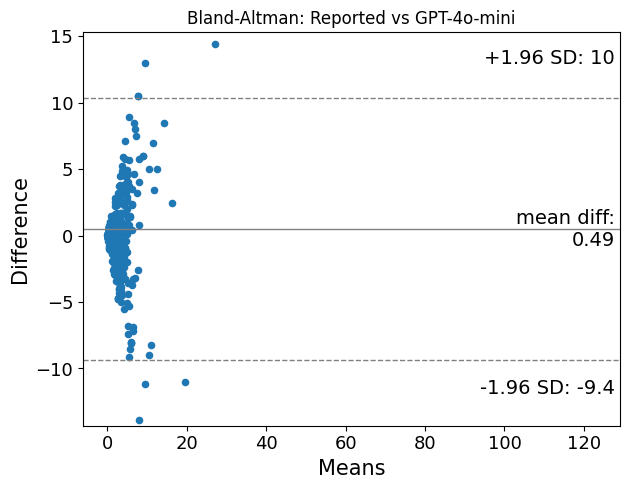

In [ ]:
fig = mean_diff_plot(df['lr_reported'], df['lr_gpt-4o-2024-08-06'])
plt.title('Bland-Altman: Reported vs GPT-4o')
plt.show()

Log transformed version

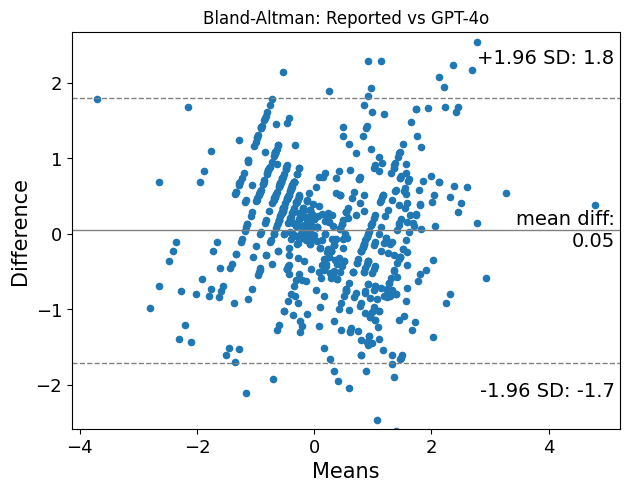

In [12]:
fig = mean_diff_plot(df['ln_lr_reported'], df['ln_lr_gpt-4o-2024-08-06'])
plt.title('Bland-Altman: Reported vs GPT-4o')
plt.show()